# Constrained-Mechanical-Systems-Forward-Dynamic-Simulation-of-Chain-links
Multibody dynamics modeling and numerical methods

## Close-chain Four-link

In [1]:
%matplotlib inline
import os
import numpy as np
from scipy.integrate import solve_ivp
from IPython.display import display, Markdown
import matplotlib as mpl
from Models.models import *
from utils.SolutionDemo import * 
sp.init_printing()
mpl.rcParams['figure.dpi'] = 50
repo_dir = os.path.dirname(os.getcwd())

### 1 Explicit calculation of the Lagrange multiplier

In [2]:
m=[1, 1, 1]
l=[1, 4, 2.5, 3]
Fourbar_Model = ExplictModel(m=m, l=l, close_chain=True)    
y0 = [None, None, np.pi/2+np.pi/12, None, None, None, None, None, None]
y_dot = [None, None, 0, None, None, None, None, None, None]
y = np.concatenate(Fourbar_Model.initial_condition(y0, y_dot))
g = np.tile([9.81, 0, 0], len(m))
f = [5, 0, 0, 0, 0, 0, 0, 0, 0]

### System constrains:

### System governing equations

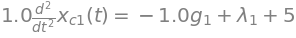

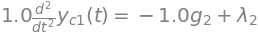

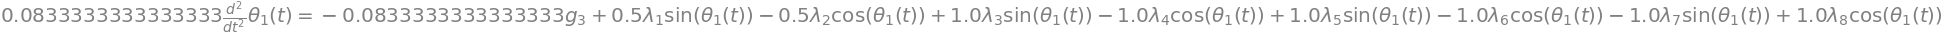

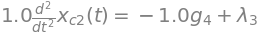

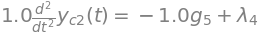

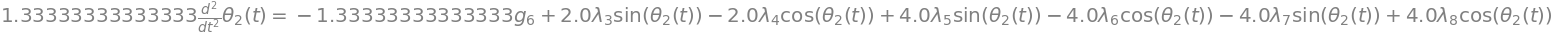

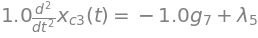

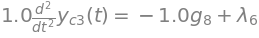

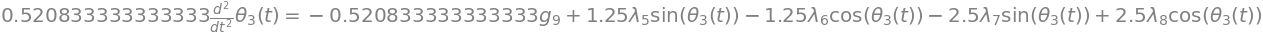

In [3]:
print_constrains(Fourbar_Model)
print_govs(Fourbar_Model, f)

In [3]:
ode = 'RK45'
sol = solve_ivp(Fourbar_Model.sim, [0, 10], y, method=ode, args=(f, g, None), t_eval=np.linspace(0, 10, 200))
Fourbar = SolutionDemo(sol, m, l, rot=-np.pi/2)
multipliers = get_multipliers(Fourbar_Model, f, g, sol, show=False)
print(Fourbar.links.shape)

(3, 200, 2, 2)


In [4]:
Fourbar.more_anim(multipliers, title='Fourbar', interval=50, save_as=None)

In [4]:
ode = 'DOP853'
sol = solve_ivp(Fourbar_Model.sim, [0, 10], y, method=ode, args=(f, g, None), t_eval=np.linspace(0, 10, 200))
Fourbar = SolutionDemo(sol, m, l, rot=-np.pi/2)
multipliers = get_multipliers(Fourbar_Model, f, g, sol, show=False)
print(Fourbar.links.shape)

(3, 200, 2, 2)


In [5]:
# fig, ax = plt.subplots(figsize=(5,4))
# sns.set_style('white')
# ax.plot(Fourbar.links[:, 0, 0], Fourbar.links[:, 0, 1], '-o', c='tab:blue', lw=2, markersize=10)
# ax.plot([Fourbar.links[0, 0, 0, 0], Fourbar.links[-1, 0, 0, 1]], 
#         [Fourbar.links[0, 0, 1, 0], Fourbar.links[-1, 0, 1, 1]], 
#         '-o', c='grey', lw=2, markersize=10)
# ax.axis('equal')
# ax.set_axis_off()
# fig.savefig(repo_dir+'/imgs/Fourbar.eps')

In [4]:
gif = Fourbar.animate(title=ode, interval=50, axis='off', save_as=repo_dir+'/imgs/Fourbar.gif')

In [6]:
Fourbar.more_anim(multipliers, title='Fourbar', interval=50, save_as=repo_dir+'/imgs/Fourbar.mp4')